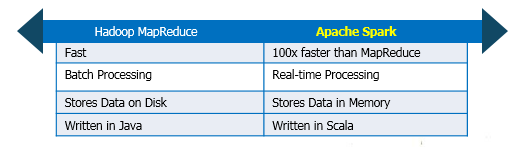

In [ ]:
## Install JDK
## Install Spark
## Set Environment variables
## Create a Spark Session
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.6.tgz
!tar -xvf spark-2.4.3-bin-hadoop2.6.tgz
!pip install -q findspark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.6"
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [2]:
## Read the CSV file into a DataFrame
df0 = spark.read.csv("/content/drive/MyDrive/datasets/framingham00.csv",header=True)
df0.show()

+------+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|   sex|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|  BMI|heartRate|glucose|TenYearCHD|
+------+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|  male| 39|        4|            0|         0|     0|              0|           0|       0|    195|  106|   70|26.97|       80|     77|         N|
|female| 46|        2|            0|         0|     0|              0|           0|       0|    250|  121|   81|28.73|       95|     76|         N|
|  male| 48|        1|            1|        20|     0|              0|           0|       0|    245|127.5|   80|25.34|       75|     70|         N|
|female| 61|        3|            1|        30|     0|              0|           1|       0|    225|  150|   95|

In [3]:
#we have a pyspark dataframe
type(df0)

pyspark.sql.dataframe.DataFrame

In [4]:
#the numbre of rows
df0.count()

4240

In [5]:
#rename the sex column to male --> 0 or 1
df1 = df0.withColumnRenamed("sex","male")

In [6]:
from pyspark.sql.functions import when
#change the column values
# male --> 1 and female --> 0
df2 = df1.withColumn("male", when(df1.male == "male","1")
                                 .when(df1.male == "female","0")
                                 .otherwise(df1.male))
df2.show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|  BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|   1| 39|        4|            0|         0|     0|              0|           0|       0|    195|  106|   70|26.97|       80|     77|         N|
|   0| 46|        2|            0|         0|     0|              0|           0|       0|    250|  121|   81|28.73|       95|     76|         N|
|   1| 48|        1|            1|        20|     0|              0|           0|       0|    245|127.5|   80|25.34|       75|     70|         N|
|   0| 61|        3|            1|        30|     0|              0|           1|       0|    225|  150|   95|28.58|       6

In [7]:
#change the column values
# TenYearCHD --> 1 and !TenYearCHD --> 0
df3 = df2.withColumn("TenYearCHD", when(df2.TenYearCHD == "Y","1")
                                 .when(df2.TenYearCHD == "N","0")
                                 .otherwise(df2.TenYearCHD))
df3.show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|  BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|   1| 39|        4|            0|         0|     0|              0|           0|       0|    195|  106|   70|26.97|       80|     77|         0|
|   0| 46|        2|            0|         0|     0|              0|           0|       0|    250|  121|   81|28.73|       95|     76|         0|
|   1| 48|        1|            1|        20|     0|              0|           0|       0|    245|127.5|   80|25.34|       75|     70|         0|
|   0| 61|        3|            1|        30|     0|              0|           1|       0|    225|  150|   95|28.58|       6

In [8]:
#verify the datatype of our dataset
df3.printSchema()

root
 |-- male: string (nullable = true)
 |-- age: string (nullable = true)
 |-- education: string (nullable = true)
 |-- currentSmoker: string (nullable = true)
 |-- cigsPerDay: string (nullable = true)
 |-- BPMeds: string (nullable = true)
 |-- prevalentStroke: string (nullable = true)
 |-- prevalentHyp: string (nullable = true)
 |-- diabetes: string (nullable = true)
 |-- totChol: string (nullable = true)
 |-- sysBP: string (nullable = true)
 |-- diaBP: string (nullable = true)
 |-- BMI: string (nullable = true)
 |-- heartRate: string (nullable = true)
 |-- glucose: string (nullable = true)
 |-- TenYearCHD: string (nullable = true)



In [9]:
from pyspark.sql.types import *
from pyspark.sql.functions import col

#change the columns datatypes from string to int/float
df4 = df3.withColumn("male",col("male").cast(IntegerType())) \
    .withColumn("age",col("age").cast(IntegerType())) \
    .withColumn("education",col("education").cast(FloatType())) \
    .withColumn("currentSmoker",col("currentSmoker").cast(IntegerType())) \
    .withColumn("cigsPerDay",col("cigsPerDay").cast(FloatType())) \
    .withColumn("BPMeds",col("BPMeds").cast(FloatType())) \
    .withColumn("prevalentStroke",col("prevalentStroke").cast(IntegerType())) \
    .withColumn("prevalentHyp",col("prevalentHyp").cast(IntegerType())) \
    .withColumn("diabetes",col("diabetes").cast(IntegerType())) \
    .withColumn("totChol",col("totChol").cast(FloatType())) \
    .withColumn("sysBP",col("sysBP").cast(FloatType())) \
    .withColumn("diaBP",col("diaBP").cast(FloatType())) \
    .withColumn("BMI",col("BMI").cast(FloatType())) \
    .withColumn("heartRate",col("heartRate").cast(FloatType())) \
    .withColumn("glucose",col("glucose").cast(FloatType())) \
    .withColumn("TenYearCHD",col("TenYearCHD").cast(IntegerType()))
df4.printSchema()

root
 |-- male: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- education: float (nullable = true)
 |-- currentSmoker: integer (nullable = true)
 |-- cigsPerDay: float (nullable = true)
 |-- BPMeds: float (nullable = true)
 |-- prevalentStroke: integer (nullable = true)
 |-- prevalentHyp: integer (nullable = true)
 |-- diabetes: integer (nullable = true)
 |-- totChol: float (nullable = true)
 |-- sysBP: float (nullable = true)
 |-- diaBP: float (nullable = true)
 |-- BMI: float (nullable = true)
 |-- heartRate: float (nullable = true)
 |-- glucose: float (nullable = true)
 |-- TenYearCHD: integer (nullable = true)



In [10]:
from pyspark.sql.functions import col,isnan, when, count
#check for null values
df4.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df4.columns]
   ).show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|   0|  0|      105|            0|        29|    53|              0|           0|       0|     50|    0|    0| 19|        1|    388|         0|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+



In [11]:
# get education median value
import pyspark.sql.functions as F
med = df4.approxQuantile('education',[0.5],0.1)[0]
print(med)

1.0


In [12]:
# Replace missing education with median value
df5 = df4.na.fill(med,["education"])
df5.show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|  BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+-----+---------+-------+----------+
|   1| 39|      4.0|            0|       0.0|   0.0|              0|           0|       0|  195.0|106.0| 70.0|26.97|     80.0|   77.0|         0|
|   0| 46|      2.0|            0|       0.0|   0.0|              0|           0|       0|  250.0|121.0| 81.0|28.73|     95.0|   76.0|         0|
|   1| 48|      1.0|            1|      20.0|   0.0|              0|           0|       0|  245.0|127.5| 80.0|25.34|     75.0|   70.0|         0|
|   0| 61|      3.0|            1|      30.0|   0.0|              0|           1|       0|  225.0|150.0| 95.0|28.58|     65.

In [13]:
#check if education still have null values
df5.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df5.columns]
   ).show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|   0|  0|        0|            0|        29|    53|              0|           0|       0|     50|    0|    0| 19|        1|    388|         0|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+



In [14]:
#delete all rows with null values
df6 = df5.na.drop()

In [15]:
#verify if we still have null values or not!
df6.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df5.columns]
   ).show()

+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|male|age|education|currentSmoker|cigsPerDay|BPMeds|prevalentStroke|prevalentHyp|diabetes|totChol|sysBP|diaBP|BMI|heartRate|glucose|TenYearCHD|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+
|   0|  0|        0|            0|         0|     0|              0|           0|       0|      0|    0|    0|  0|        0|      0|         0|
+----+---+---------+-------------+----------+------+---------------+------------+--------+-------+-----+-----+---+---------+-------+----------+



In [16]:
#the new size of our dataset
df6.count()

3751

In [18]:
## Write the transformed dataframe to a new csv file
#df6.write.format("csv").save("/content/drive/MyDrive/datasets/framingham2",header = 'true')

In [19]:
#!ls

In [20]:
#!cat bank_prospects_transformed/part-00000-588f51a7-d80b-4402-aed5-717e24ffcc0c-c000.csv